# Working with RACMO Model Output

* Data is on a rotated pole

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfe
import pyproj
import pandas as pd

### Read in data

In [2]:
ds = xr.open_dataset('~/Documents/RACMO/RACMO2.3p2_ANT27_precip_daily_1979_1980.nc')

### Look at dataset we have just read in

In [3]:
# Examine the dataset (dimensions, coordinates, data variables and global attributes)
ds

<xarray.Dataset>
Dimensions:       (bnds: 2, height: 1, nblock1: 40, nblock2: 400, rlat: 240, rlon: 262, time: 731)
Coordinates:
    lon           (rlat, rlon) float64 ...
    lat           (rlat, rlon) float64 ...
  * rlon          (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 32.0 32.25 32.5
  * rlat          (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.25 29.5 29.75
  * height        (height) float64 0.0
  * time          (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1980-12-31
Dimensions without coordinates: bnds, nblock1, nblock2
Data variables:
    dir           (rlat, rlon) float64 ...
    block1        (nblock1) int32 ...
    block2        (nblock2) int32 ...
    time_bnds     (time, bnds) datetime64[ns] ...
    dtg           (time) int32 ...
    date_bnds     (time, bnds) int32 ...
    hms_bnds      (time, bnds) int32 ...
    assigned      (time) int32 ...
    rotated_pole  float32 ...
    precip        (time, height, rlat, rlon) float32 ...
Attributes:
    Conventions:   

In [4]:
# Look at the precipitation variable
ds.precip

<xarray.DataArray 'precip' (time: 731, height: 1, rlat: 240, rlon: 262)>
[45965280 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 31.75 32.0 32.25 32.5
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.0 29.25 29.5 29.75
  * height   (height) float64 0.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1980-12-31
Attributes:
    standard_name:  precipitation_flux
    long_name:      Total Precipitative Flux
    units:          kg m-2 s-1
    cell_methods:   time: 24-hr averaged values
    grid_mapping:   rotated_pole

### Select precip 'Data variable' and squeeze to remove redundant height coordinate

In [5]:
precip = ds.precip.squeeze()
precip

<xarray.DataArray 'precip' (time: 731, rlat: 240, rlon: 262)>
[45965280 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 31.75 32.0 32.25 32.5
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.0 29.25 29.5 29.75
    height   float64 0.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 1980-12-31
Attributes:
    standard_name:  precipitation_flux
    long_name:      Total Precipitative Flux
    units:          kg m-2 s-1
    cell_methods:   time: 24-hr averaged values
    grid_mapping:   rotated_pole

### Project rotated grid onto lat-lon grid

In [6]:
ds.rotated_pole

<xarray.DataArray 'rotated_pole' ()>
array(9.96921e+36, dtype=float32)
Attributes:
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_latitude:   -180.0
    grid_north_pole_longitude:  -170.0
    proj4_params:               -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    proj_parameters:            -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    projection_name:            rotated_latitude_longitude
    long_name:                  projection details
    EPSG_code:                  

In [7]:
rad2deg = 180./np.pi

p = pyproj.Proj('+ellps=WGS84 +proj=ob_tran +o_proj=latlon +o_lat_p=-180.0 +o_lon_p=-170.0 +lon_0=180.0')

rlon = ds.rlon.values
rlat = ds.rlat.values

x1,y1 = np.meshgrid(rlon, rlat)

lon, lat = p(x1, y1) 

lon, lat = lon*rad2deg, lat*rad2deg    # radians --> degrees

In [8]:
# lets have a look at the data (max and min values)
np.min(precip.values), np.max(precip.values), np.min(lon), np.max(lon), np.min(lon), np.max(lon), np.min(lat), np.max(lat)

(-1.8083428e-07,
 0.0028139532,
 -179.99416710873103,
 179.98894588985064,
 -179.99416710873103,
 179.98894588985064,
 -90.0,
 -46.74917892351622)

### Plot map

In [9]:
# select the first time from the data 
data = precip.isel(time=0)

# see what it looks like (data, coordinates and attributes)
data

<xarray.DataArray 'precip' (rlat: 240, rlon: 262)>
array([[6.673193e-05, 1.738828e-04, 1.959459e-04, ..., 7.532207e-05,
        7.269982e-05, 6.908291e-05],
       [2.103231e-04, 2.199079e-04, 2.307586e-04, ..., 8.038575e-05,
        7.857729e-05, 7.541250e-05],
       [1.844622e-04, 4.973246e-05, 5.136007e-05, ..., 9.132689e-05,
        9.195985e-05, 9.006097e-05],
       ...,
       [2.233440e-05, 2.025468e-05, 1.808453e-05, ..., 3.345638e-06,
        3.436061e-06, 3.436061e-06],
       [2.441412e-05, 2.839271e-05, 2.025468e-05, ..., 3.255216e-06,
        3.255216e-06, 3.436061e-06],
       [2.396200e-05, 2.269609e-05, 2.170144e-05, ..., 3.164793e-06,
        3.255216e-06, 3.345638e-06]], dtype=float32)
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 ... 31.75 32.0 32.25 32.5
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 ... 29.0 29.25 29.5 29.75
    height   float64 0.0
    time   

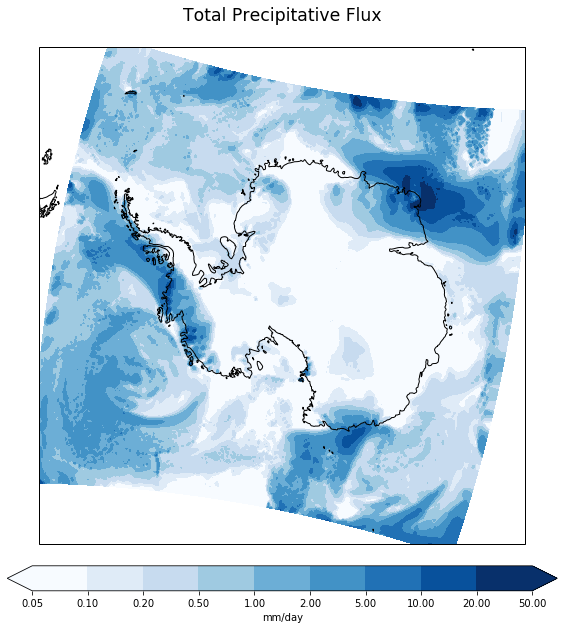

In [10]:
plt.figure(figsize=(10,10))

ax = plt.subplot( projection=ccrs.Stereographic(central_longitude=0., central_latitude=-90.) )

ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())

# set up a Cartopy coordinate reference system for the data (rotated pole as described above)
data_crs = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# set up pseudo-log contour levels and a norm that maps colour indices onto them appropriately 
levels = [0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

# plot data (converting flux to mm/day)
result = ax.contourf(rlon, rlat, data*86400., levels, norm=norm, extend='both', cmap='Blues', transform=data_crs)

ax.coastlines(resolution='50m')

plt.colorbar(result, orientation='horizontal', label='mm/day', extend='both', fraction=0.046, pad=0.04)

ax.set_title(data.long_name+'\n', size='xx-large')

print('')

### Plot deals with spatial dimensions but not time, so add time information to title

In [11]:
# look at the time coordinate
data.coords['time']

<xarray.DataArray 'time' ()>
array('1979-01-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    height   float64 0.0
    time     datetime64[ns] 1979-01-01
Attributes:
    axis:       T
    long_name:  time
    dtgstart:   1979010100
    bounds:     time_bnds

In [12]:
# time has bounds, so extract the bounds for the first time step
time_bounds = ds.time_bnds.isel(time=0)
time_bounds.values

array(['1979-01-01T00:00:00.000000000', '1979-01-02T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [13]:
# convert the time bounds to Python datetimes
tb_values = [pd.Timestamp(tbv).to_pydatetime() for tbv in time_bounds.values]
tb_values

[datetime.datetime(1979, 1, 1, 0, 0), datetime.datetime(1979, 1, 2, 0, 0)]

In [14]:
# format the time bounds as "From ... to ..."
# See https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior for format codes
time_fmt = '%Y-%m-%d %H:%M:%S'
time_bounds_str = 'From {} to {}'.format(tb_values[0].strftime(time_fmt), tb_values[1].strftime(time_fmt))
time_bounds_str

'From 1979-01-01 00:00:00 to 1979-01-02 00:00:00'

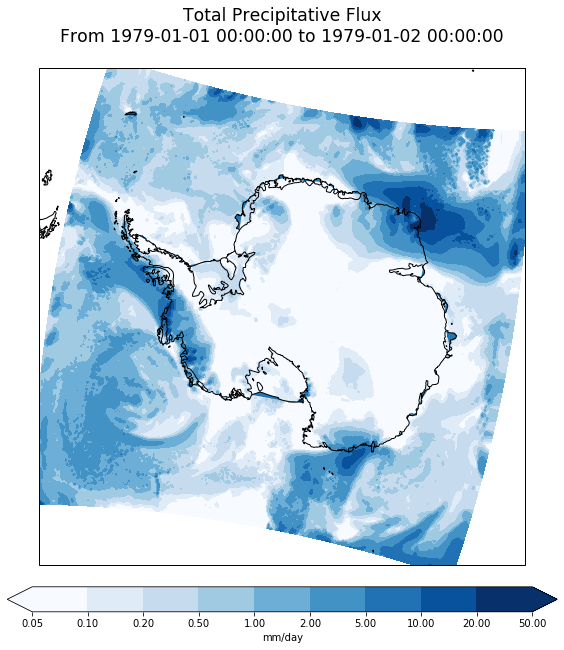

In [15]:
plt.figure(figsize=(10,10))

ax = plt.subplot( projection=ccrs.Stereographic(central_longitude=0., central_latitude=-90.) )

ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())

# set up a Cartopy coordinate reference system for the data (rotated pole as described above)
data_crs = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# set up pseudo-log contour levels and a norm that maps colour indices onto them appropriately 
levels = [0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

# plot data (converting flux to mm/day)
result = ax.contourf(rlon, rlat, data*86400., levels, norm=norm, extend='both', cmap='Blues', transform=data_crs)

ax.coastlines(resolution='50m')

# oh, and add the ice shelves too (see available features and resolutions at https://www.naturalearthdata.com/features/)
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m', edgecolor='k'))

plt.colorbar(result, orientation='horizontal', label='mm/day', extend='both', fraction=0.046, pad=0.04)

ax.set_title(data.long_name+'\n'+time_bounds_str+'\n', size='xx-large')

print('')

### Make the same plot but using the true lon and lat coordinates projected into the plot's coordinate system

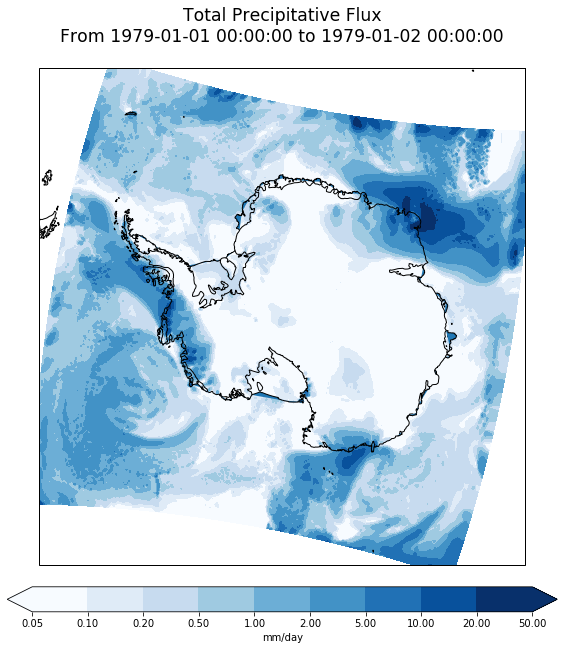

In [16]:
plt.figure(figsize=(10,10))

projection=ccrs.Stereographic(central_longitude=0., central_latitude=-90.)
plot_coords = projection.transform_points(ccrs.PlateCarree(), lon, lat)
x, y = plot_coords[:,:,0], plot_coords[:,:,1]

ax = plt.subplot(projection=projection)

ax.set_extent([-180,180,-90,-55], ccrs.PlateCarree())

# set up a Cartopy coordinate reference system for the data (rotated pole as described above)
data_crs = ccrs.RotatedPole(pole_longitude=ds.rotated_pole.grid_north_pole_longitude,
                            pole_latitude=ds.rotated_pole.grid_north_pole_latitude)

# set up pseudo-log contour levels and a norm that maps colour indices onto them appropriately 
levels = [0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50]
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

# plot data (converting flux to mm/day)
result = ax.contourf(x, y, data*86400., levels, norm=norm, extend='both', cmap='Blues',
                     transform=projection)

ax.coastlines(resolution='50m')

# oh, and add the ice shelves too (see available features and resolutions at https://www.naturalearthdata.com/features/)
ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m', edgecolor='k'))

plt.colorbar(result, orientation='horizontal', label='mm/day', extend='both', fraction=0.046, pad=0.04)

ax.set_title(data.long_name+'\n'+time_bounds_str+'\n', size='xx-large')

print('')